In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.oneway as oneway
import pylab

We have three different machines which produce parfumes. Are these machines produce parfumes with different volume? H0 --> m1 = m2 = m3; H1 --> at least one of the means is different;

In [3]:
m1 = np.array([143,153,164,185,194,201,130,140,150,160,190,211,222,120,200,136,143,200,160,170,150])
m2 = np.array([140,150,160,180,190,200,130,140,150,160,190,211,222,120,200,136,143,200,160,170,150])
m3 = np.array([150,155,170,150,240,249,186,140,160,200,120,222,221,223,211,222,120,280])

1.Check for normality:

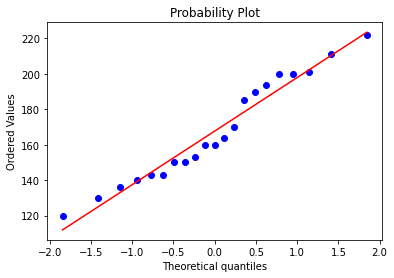

In [9]:
stats.probplot(m1,dist='norm',plot=pylab);

<AxesSubplot:ylabel='Count'>

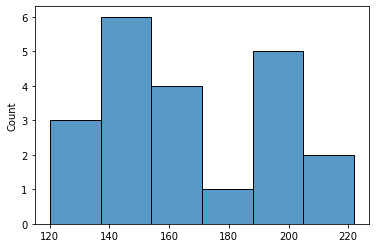

In [18]:
sns.histplot(m1)

In [10]:
stats.shapiro(m1)

ShapiroResult(statistic=0.9502843618392944, pvalue=0.34488698840141296)

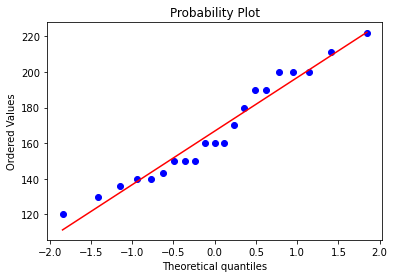

In [11]:
stats.probplot(m2,dist='norm',plot=pylab);

<AxesSubplot:ylabel='Count'>

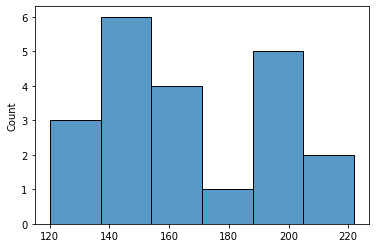

In [19]:
sns.histplot(m2)

In [4]:
stats.shapiro(m2)

ShapiroResult(statistic=0.947755753993988, pvalue=0.30872842669487)

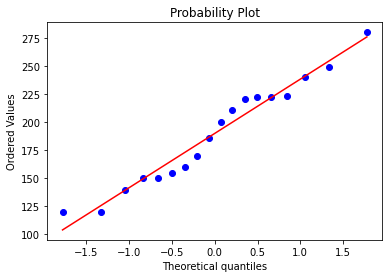

In [12]:
stats.probplot(m3,dist='norm',plot=pylab);

<AxesSubplot:ylabel='Count'>

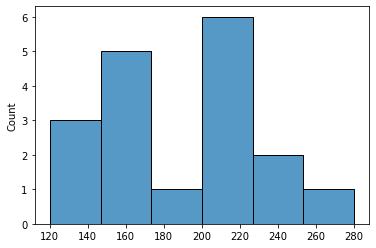

In [20]:
sns.histplot(m3)

In [5]:
stats.shapiro(m3)

ShapiroResult(statistic=0.9541516900062561, pvalue=0.49378958344459534)

pvalues are greater than 0.05 --> fail to reject he null hypothesis, data is normaly distributed

2. Check for homogeneity of variances for normaly distributed data:

In [16]:
stats.bartlett(m1,m2,m3)

BartlettResult(statistic=5.503956910017339, pvalue=0.06380150784294757)

pvalue is greater than 0.05 --> fail to reject the Null hypothesis, we don't have enough evidence to accept hypothesis that variances are not equal

Perform One-way ANOVA

In [22]:
stats.f_oneway(m1, m2, m3)

F_onewayResult(statistic=2.6119640271916396, pvalue=0.08215742375784461)

In [23]:
oneway.anova_oneway((m1, m2, m3),use_var='equal',welch_correction=False)

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 2.6119640271916413
pvalue = 0.08215742375784461
df = (2.0, 57.0)
df_num = 2.0
df_denom = 57.0
nobs_t = 60.0
n_groups = 3
means = array([167.71428571, 166.76190476, 189.94444444])
nobs = array([21., 21., 18.])
vars_ = array([ 858.81428571,  852.49047619, 2162.40849673])
use_var = 'equal'
welch_correction = False
tuple = (2.6119640271916413, 0.08215742375784461)

pvalue is greater than 0.05 --> fail to reject the Null hypothesis that these three machines produce parfumes with equal volume.

Note:
if data is not homogeneity, but have normal distribution use Welch's ANOVA;
if data is homogeneity, but don't have normal distribution use Kruskal-Wallis Test;

## How to Perform Post-Hoc test after ANOVA to understand which group is different if we are rejected the Null Hypothesis for equality. In our case the test is for studing purposes only.

### Tukey's Test

In [7]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [20]:
data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [24]:
data_new = data.loc[:,["horsepower", "origin"]].dropna()
data_new.head()

,horsepower,origin
0,130.0,usa
1,165.0,usa
2,150.0,usa
3,150.0,usa
4,140.0,usa


In [26]:
result = pairwise_tukeyhsd(data_new["horsepower"], data_new["origin"], alpha = 0.05)
print(result)                   

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
europe  japan  -0.7234 0.9907 -13.8185 12.3717  False
europe    usa  38.4902    0.0  27.6396 49.3407   True
 japan    usa  39.2135    0.0  28.9713 49.4558   True
-----------------------------------------------------


Only the cars from USA have different horsepower compare to the other groups.

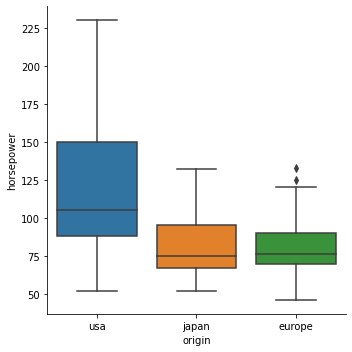

In [33]:
sns.catplot(data = data_new, x="origin", y="horsepower", kind="box")
plt.show()